In [93]:
import numpy as np
np.random.seed(1)
x = np.random.random_sample(50)*100
y = np.random.random_sample(50)*100

z = [x[i]**2 + y[i]**3 for i in xrange(len(x))]
z = [y[i] for i in xrange(len(x))]

In [94]:
import GPflow
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline



polynomial fit

name.likelihood.variance transform:+ve prior:None
[ 1.]
name.kern.variance transform:+ve prior:None
[ 1.]
name.kern.offset transform:+ve prior:None
[ 1.]


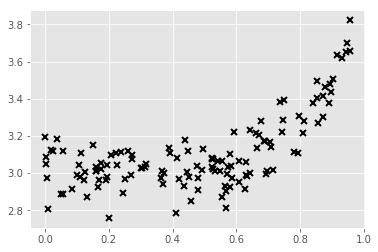

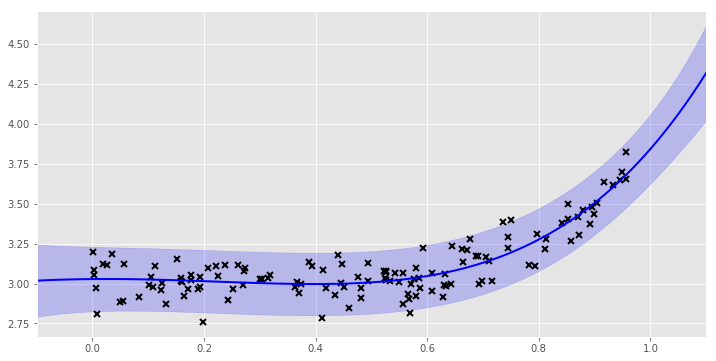

In [162]:
print 'polynomial fit'
N = 130
X = np.random.rand(N,1)
Y = X**6 + np.random.randn(N,1)*0.1 + 3
plt.plot(X, Y, 'kx', mew=2)
k = GPflow.kernels.Polynomial(1, degree=10.)
m = GPflow.gpr.GPR(X, Y, kern=k)
print m
m.optimize()
# force variance size  m.likelihood.variance = 0.001
def plot(m):
    xx = np.linspace(-0.1, 1.1, 100)[:,None]
    mean, var = m.predict_y(xx)
    plt.figure(figsize=(12, 6))
    plt.plot(X, Y, 'kx', mew=2)
    plt.plot(xx, mean, 'b', lw=2)
    plt.fill_between(xx[:,0], mean[:,0] - 2*np.sqrt(var[:,0]), mean[:,0] + 2*np.sqrt(var[:,0]), color='blue', alpha=0.2)
    plt.xlim(-0.1, 1.1)
plot(m)

polynomial fit

name.kern.variance transform:+ve prior:None
[ 1.]
name.kern.offset transform:+ve prior:None
[ 1.]
name.likelihood.variance transform:+ve prior:None
[ 1.]


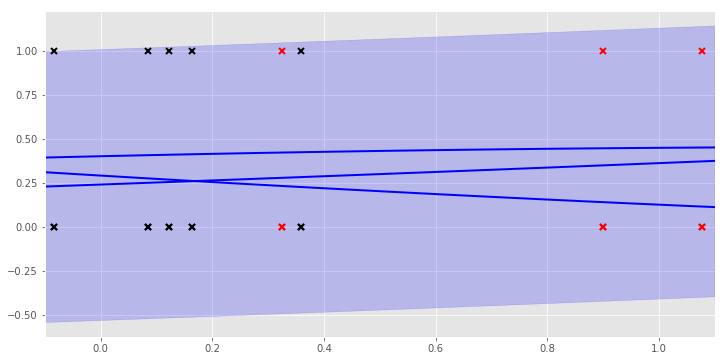

In [198]:

print 'polynomial fit'
N = 132
X = np.random.rand(N,1)
X=X.reshape(-1,2)

Xii = np.random.rand(N,1)

x=X**2
Y = x + np.random.randn(N/2,1)*0.1 + 3


X = np.vstack([np.random.randn(10,2) + [2,2],
               np.random.randn(10,2) + [-2,2],
               np.random.randn(10,2) + [2,-2]])

Y = np.repeat(np.eye(3), 10, 0)


k = GPflow.kernels.Polynomial(1, degree=2.,active_dims = [0]) 
m = GPflow.gpr.GPR(X, Y, kern=k)

print m 

o = tf.train.AdamOptimizer()
m.optimize()
# force variance size  m.likelihood.variance = 0.001
def plot(m):
    xx = np.linspace(-0.1, 1.1, 100)[:,None]
    mean, var = m.predict_y(xx)
    plt.figure(figsize=(12, 6))
    plt.plot(X[:,0], Y, 'kx', mew=2)
    plt.plot(X[:,1], Y, 'rx', mew=2)
    plt.plot(xx, mean, 'b', lw=2)
    plt.fill_between(xx[:,0], mean[:,0] - 2*np.sqrt(var[:,0]), mean[:,0] + 2*np.sqrt(var[:,0]), color='blue', alpha=0.2)
    plt.xlim(-0.1, 1.1)
plot(m)

In [199]:
Y.shape

(30, 3)